#### 딥러닝의 기본 개념 : 시작과 XOR 문제

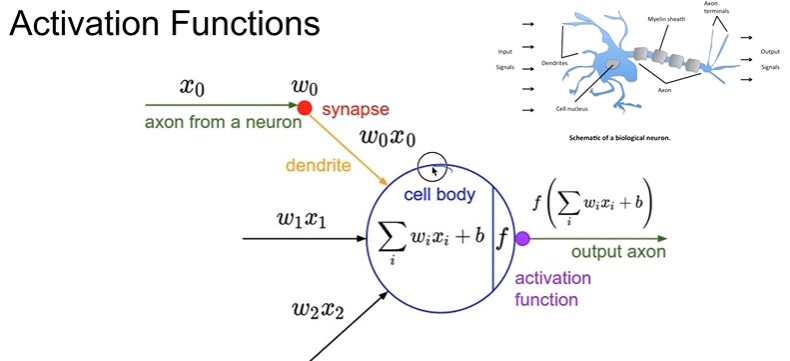

In [3]:
Image("C:\스크린샷(558).png")

or/and 문제는 linear separable함  

xor 문제는 linear separable하지 않음 => we need to use mlp(multilayer perceptrons)  
=> 각각의 weight과 bias를 학습할수없다는 문제  

(by Hinton) backpropagation 으로 이 문제 해결  
(by lecun) convolutional neural netoworks으로 문제 해결  

a big problem  

    - just did not work well form normal neural nets with many layers  
    - svm, randomforest 같은 other rising machine learning  
    
(by cifar) - neural networks with many layer really could be trained well if the weights are initialized in a clever way rather than randomly=> deeplearning으로 리브랜딩  


##### XOR using nn

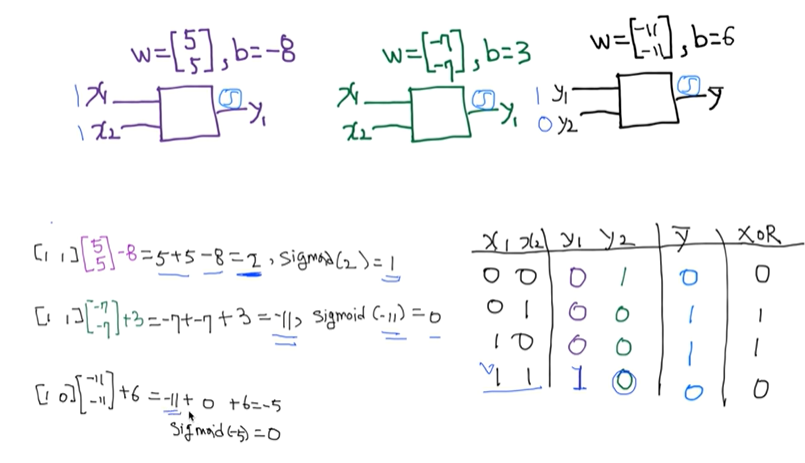

In [4]:
Image("C:\스크린샷(559).png")

#### 딥러닝의 기본 개념2: Back-propagation & 딥네트워크 학습시키기

weight과 bias를 어떻게 자동적으로 학습할 수 있을까 ?  

$f(x)= wx+b, g=wx, => f= g+b$  


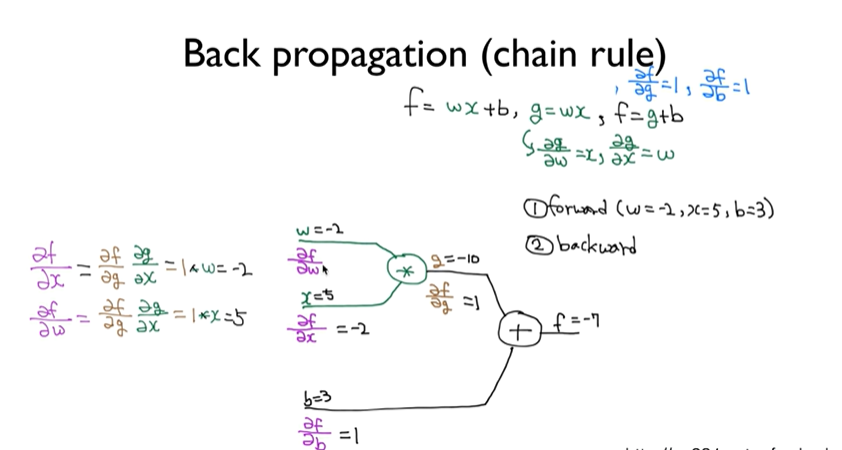

In [5]:
Image("C:\스크린샷(560).png")

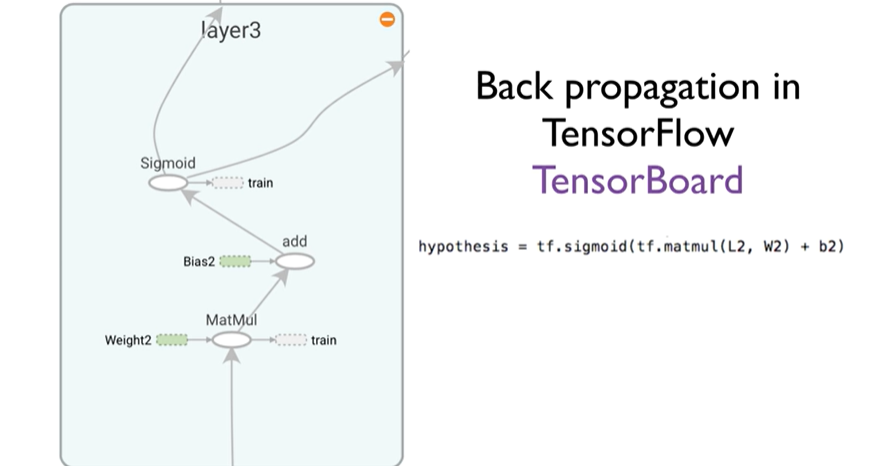

In [7]:
Image("C:\스크린샷(561).png")

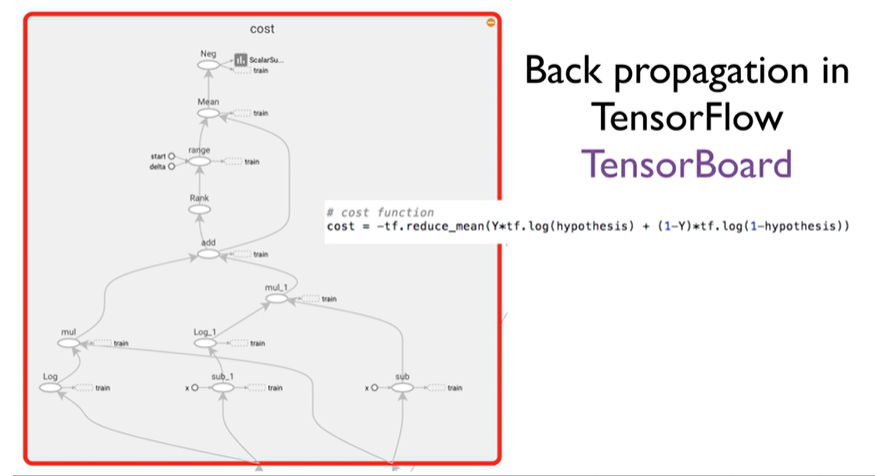

In [8]:
Image("C:\스크린샷(562).png")

## 코드 실습 
1. 3개의 logistic regression을 통해 xor 문제를 해결

C:\Users\alaco\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


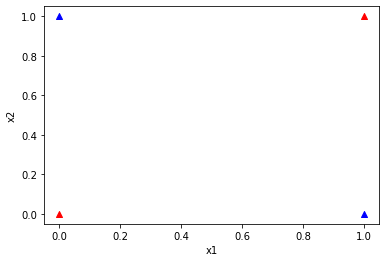

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [11]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [12]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

In [13]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost


In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [15]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [16]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [17]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.8487
Iter: 5000, Loss: 0.6847
Iter: 10000, Loss: 0.6610
Iter: 15000, Loss: 0.6154
Iter: 20000, Loss: 0.5722
Iter: 25000, Loss: 0.5433
Iter: 30000, Loss: 0.5211
Iter: 35000, Loss: 0.4911
Iter: 40000, Loss: 0.4416
Iter: 45000, Loss: 0.3313
Testset Accuracy: 1.0000


In [20]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [21]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [22]:
log_path = "./logs/xor"
writer = tf.summary.create_file_writer(log_path)

In [23]:
W1 = tf.Variable(tf.random.normal((2, 10)), name='weight1')
b1 = tf.Variable(tf.random.normal((10,)), name='bias1')

W2 = tf.Variable(tf.random.normal((10, 10)), name='weight2')
b2 = tf.Variable(tf.random.normal((10,)), name='bias2')

W3 = tf.Variable(tf.random.normal((10, 10)), name='weight3')
b3 = tf.Variable(tf.random.normal((10,)), name='bias3')

W4 = tf.Variable(tf.random.normal((10, 1)), name='weight4')
b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

def neural_net(features, step):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

    with writer.as_default():
        tf.summary.histogram("weights1", W1, step=step)
        tf.summary.histogram("biases1", b1, step=step)
        tf.summary.histogram("layer1", layer1, step=step)

        tf.summary.histogram("weights2", W2, step=step)
        tf.summary.histogram("biases2", b2, step=step)
        tf.summary.histogram("layer2", layer2, step=step)

        tf.summary.histogram("weights3", W3, step=step)
        tf.summary.histogram("biases3", b3, step=step)
        tf.summary.histogram("layer3", layer3, step=step)

        tf.summary.histogram("weights4", W4, step=step)
        tf.summary.histogram("biases4", b4, step=step)
        tf.summary.histogram("hypothesis", hypothesis, step=step)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    with writer.as_default():
        tf.summary.scalar('loss', cost, step=step)
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels, step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features, step),labels)
    return tape.gradient(loss_value, [W1, W2, W3, W4, b1, b2, b3, b4])

In [24]:
EPOCHS = 3000

for step in range(EPOCHS):    
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features, step), features, labels, step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, W4, b1, b2, b3, b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features, step),labels)
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data, step),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6946
Iter: 50, Loss: 0.6863
Iter: 100, Loss: 0.6847
Iter: 150, Loss: 0.6831
Iter: 200, Loss: 0.6814
Iter: 250, Loss: 0.6797
Iter: 300, Loss: 0.6778
Iter: 350, Loss: 0.6758
Iter: 400, Loss: 0.6736
Iter: 450, Loss: 0.6711
Iter: 500, Loss: 0.6684
Iter: 550, Loss: 0.6653
Iter: 600, Loss: 0.6617
Iter: 650, Loss: 0.6576
Iter: 700, Loss: 0.6529
Iter: 750, Loss: 0.6474
Iter: 800, Loss: 0.6411
Iter: 850, Loss: 0.6336
Iter: 900, Loss: 0.6248
Iter: 950, Loss: 0.6143
Iter: 1000, Loss: 0.6017
Iter: 1050, Loss: 0.5866
Iter: 1100, Loss: 0.5682
Iter: 1150, Loss: 0.5457
Iter: 1200, Loss: 0.5181
Iter: 1250, Loss: 0.4842
Iter: 1300, Loss: 0.4431
Iter: 1350, Loss: 0.3945
Iter: 1400, Loss: 0.3397
Iter: 1450, Loss: 0.2824
Iter: 1500, Loss: 0.2277
Iter: 1550, Loss: 0.1802
Iter: 1600, Loss: 0.1418
Iter: 1650, Loss: 0.1124
Iter: 1700, Loss: 0.0902
Iter: 1750, Loss: 0.0737
Iter: 1800, Loss: 0.0612
Iter: 1850, Loss: 0.0517
Iter: 1900, Loss: 0.0443
Iter: 1950, Loss: 0.0384
Iter: 2000, Loss: 0.033

In [25]:
%load_ext tensorboard
%tensorboard --logdir logs/xor

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12884), started 0:08:00 ago. (Use '!kill 12884' to kill it.)